In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
data=pd.read_csv('/content/archive (14).zip')

In [ ]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [ ]:
data.shape

(1470, 35)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [ ]:
label_encoders = {}
for column in data.select_dtypes(include=['object']).columns:
    if column != 'Attrition':
        label_encoders[column] = LabelEncoder()
        data[column] = label_encoders[column].fit_transform(data[column])
data['Attrition'] = data['Attrition'].apply(lambda x: 1 if x == 'Yes' else 0)

In [ ]:
X = data.drop(['Attrition'], axis=1)
y = data['Attrition']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [ ]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[250   5]
 [ 35   4]]

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.98      0.93       255
           1       0.44      0.10      0.17        39

    accuracy                           0.86       294
   macro avg       0.66      0.54      0.55       294
weighted avg       0.82      0.86      0.83       294



In [ ]:
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]
print("Feature ranking:")
for f in range(X.shape[1]):
    print(f"{f + 1}. Feature {X.columns[indices[f]]} ({importances[indices[f]]})")

Feature ranking:
1. Feature MonthlyIncome (0.07496768933556817)
2. Feature OverTime (0.0648227681621535)
3. Feature Age (0.05686534424438894)
4. Feature DailyRate (0.05050538321644945)
5. Feature TotalWorkingYears (0.048103852605074854)
6. Feature MonthlyRate (0.04708956512399062)
7. Feature EmployeeNumber (0.045296248813904726)
8. Feature HourlyRate (0.04335201364599816)
9. Feature DistanceFromHome (0.042012343520282186)
10. Feature YearsAtCompany (0.04191372576857256)
11. Feature NumCompaniesWorked (0.036034902123189314)
12. Feature JobRole (0.03273061680924493)
13. Feature PercentSalaryHike (0.03253001090362797)
14. Feature StockOptionLevel (0.0318401769744391)
15. Feature YearsWithCurrManager (0.02851212516886379)
16. Feature YearsInCurrentRole (0.027299052142420437)
17. Feature JobLevel (0.026893365242182866)
18. Feature YearsSinceLastPromotion (0.0265489742770406)
19. Feature TrainingTimesLastYear (0.025412757387657612)
20. Feature JobSatisfaction (0.025367565077897412)
21. Featu

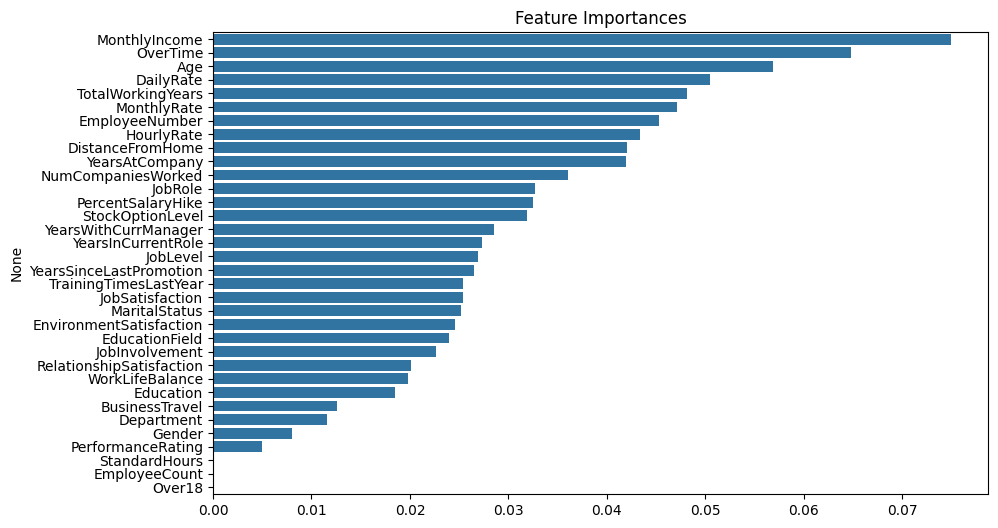

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x=importances[indices], y=X.columns[indices])
plt.title('Feature Importances')
plt.show()

In [ ]:
# Predicting the probability of attrition for each employee
data['Attrition_Probability'] = model.predict_proba(scaler.transform(data.drop(['Attrition'], axis=1)))[:, 1]

# Sorting employees by probability of leaving
most_likely_to_leave = data.sort_values(by='Attrition_Probability', ascending=False)
print("Employees most likely to leave:")
print(most_likely_to_leave[['EmployeeNumber', 'Attrition_Probability']].head(10))

Employees most likely to leave:
      EmployeeNumber  Attrition_Probability
688              959                   0.98
1332            1868                   0.95
463              622                   0.94
127              167                   0.93
911             1273                   0.93
1339            1878                   0.92
385              514                   0.91
1016            1433                   0.91
1365            1928                   0.91
720             1004                   0.91
